In [2]:
from stat_helper import *
from hdf_helper import *
from data_cleaning import *

from scipy.ndimage import gaussian_filter1d
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np
import seaborn as sns

from dateutil.parser import parse
from datetime import datetime, date, time, timedelta
import os
import re

from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest
from scipy import stats

%matplotlib inline

In [3]:
path = 'competitionfiles/COOLCAT_20091219_074253_24_20091219_074253_240.hdf'
df = big_endian_problem(h5_to_df(path))

In [4]:
stats_df = get_stats_list(df)

In [ ]:
df_arr = []
len_ch_arr = []
len_in_arr = []

files = os.listdir('./competitionfiles')

for file in files[:50]:
    
    len_ch_arr.append(len(h5_to_df('competitionfiles/' + file).columns))
    len_in_arr.append(len(h5_to_df('competitionfiles/' + file).index))
    

In [13]:
import seaborn as sns

(array([279.,   0., 339.,  20.,  14.,  31.,   7.,  24.,   0., 113.]),
 array([115. , 127.9, 140.8, 153.7, 166.6, 179.5, 192.4, 205.3, 218.2,
        231.1, 244. ]),
 <a list of 10 Patch objects>)

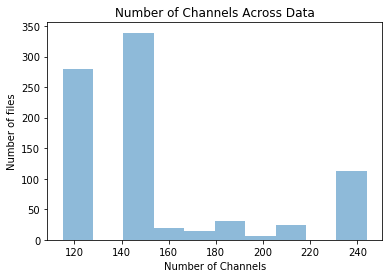

In [33]:
plt.title('Number of Channels Across Data')
plt.xlabel('Number of Channels')
plt.ylabel('Number of files')

plt.hist(ch_arr, bins=10, alpha=0.5)

In [26]:
in_arr_srs = pd.Series(in_arr)

(array([564.,  39.,  17.,  44.,  29.,  30.,  28.,  25.,  12.,  10.,   9.,
         12.,   3.,   3.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000000e+00, 2.93994667e+04, 5.87979333e+04, 8.81964000e+04,
        1.17594867e+05, 1.46993333e+05, 1.76391800e+05, 2.05790267e+05,
        2.35188733e+05, 2.64587200e+05, 2.93985667e+05, 3.23384133e+05,
        3.52782600e+05, 3.82181067e+05, 4.11579533e+05, 4.40978000e+05,
        4.70376467e+05, 4.99774933e+05, 5.29173400e+05, 5.58571867e+05,
        5.87970333e+05, 6.17368800e+05, 6.46767267e+05, 6.76165733e+05,
        7.05564200e+05, 7.34962667e+05, 7.64361133e+05, 7.93759600e+05,
        8.23158067e+05, 8.52556533e+05, 8.81955000e+05]),
 <a list of 30 Patch objects>)

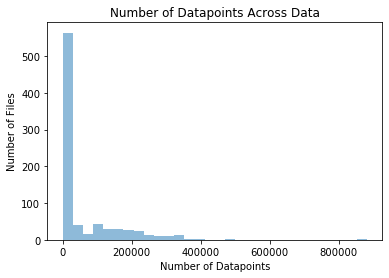

In [32]:
plt.title('Number of Datapoints Across Data')
plt.xlabel('Number of Datapoints')
plt.ylabel('Number of Files')
plt.hist(in_arr_srs, bins=30, alpha=0.5)

In [34]:
files = os.listdir('./competitionfiles')
stats_list = []

for file in files[:100]:
    stats_list.append(get_stats_list(h5_to_df('competitionfiles/' + file)))
    

(array([106.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.]),
 array([-7.01880854e+02,  3.16496710e+13,  6.32993419e+13,  9.49490129e+13,
         1.26598684e+14,  1.58248355e+14,  1.89898026e+14,  2.21547697e+14,
         2.53197368e+14,  2.84847039e+14,  3.16496710e+14]),
 <a list of 10 Patch objects>)

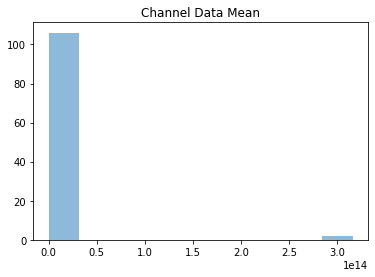

In [59]:

# Change the second index to change between stats
# order of [calc_mean(df),calc_median(df),calc_std(df),calc_max(df),calc_min(df)]
total_mean = stats_list[0][0][:]
for i in range(1,len(stats_list)):
    total_mean += stats_list[i][0][:]
total_mean /= len(stats_list)

plt.title('Channel Data Mean')
plt.hist(total_mean, bins=10, alpha=0.5)

In [60]:
total_mean

ch_1      3.400827e+03
ch_10     3.516407e+02
ch_100    4.572675e+02
ch_101    1.192639e+02
ch_102    5.418988e+08
              ...     
ch_95     3.610061e+04
ch_96     2.509192e+04
ch_97     2.279268e+03
ch_98     1.354183e+05
ch_99     7.463692e+03
Length: 142, dtype: float64